In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("Output_Data/agent_data.csv")
print(df.head())

   Time_Step  Agent_ID Behavior Microhabitat  Body_Temperature  \
0          0       800      NaN          NaN              25.0   
1          0       801      NaN          NaN              25.0   
2          0       802      NaN          NaN              25.0   
3          0       803      NaN          NaN              25.0   
4          0       804      NaN          NaN              25.0   

   Metabolic_State  
0       345.761713  
1       482.014514  
2       520.933271  
3       577.670554  
4       333.971414  


In [12]:
df_pop = pd.read_csv("Output_Data/model_data.csv")
print(df_pop.head())

   Step_ID  Rattlesnakes  Krats
0        0           200    800
1        1           200    800
2        2           200    800
3        3           200    800
4        4           200    800


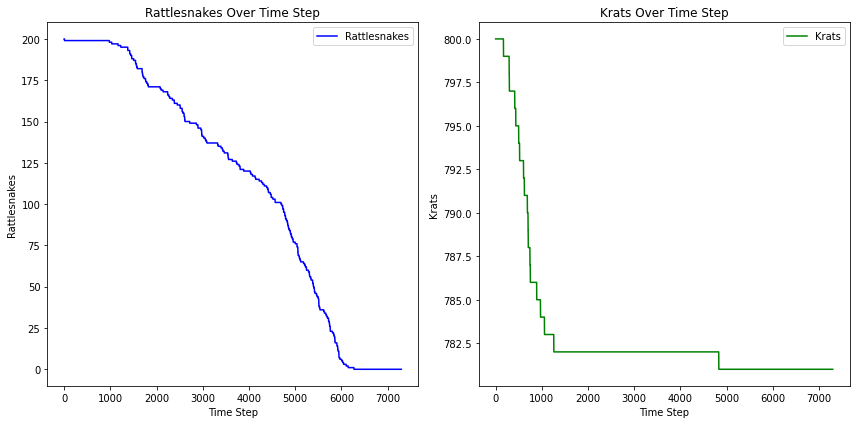

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Rattlesnakes on the left (ax1)
ax1.plot(df_pop["Step_ID"], df_pop["Rattlesnakes"], label="Rattlesnakes", color="blue")
ax1.set_title("Rattlesnakes Over Time Step")
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Rattlesnakes")
ax1.legend()

# Plot Krats on the right (ax2)
ax2.plot(df_pop["Step_ID"], df_pop["Krats"], label="Krats", color="green")
ax2.set_title("Krats Over Time Step")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Krats")
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()

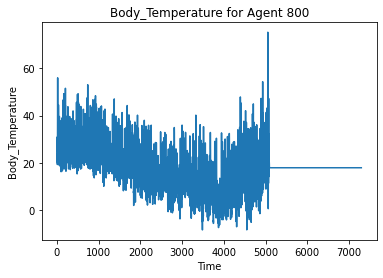

In [18]:
## Single snake
# Filter for the agent with ID 800
single_snake = df[df["Agent_ID"] == 801]

# Extract columns as Numpy arrays
time = single_snake["Time_Step"]
values = single_snake["Body_Temperature"]

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Body_Temperature")
plt.title("Body_Temperature for Agent 800")
plt.show()


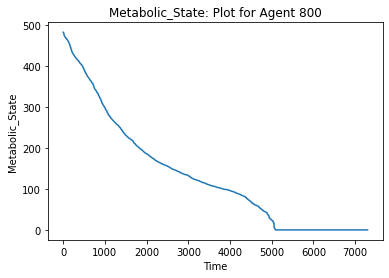

In [19]:
# Extract columns as Numpy arrays
time = single_snake["Time_Step"].to_numpy()
values = single_snake["Metabolic_State"].to_numpy()

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Metabolic_State")
plt.title("Metabolic_State: Plot for Agent 800")
plt.show()

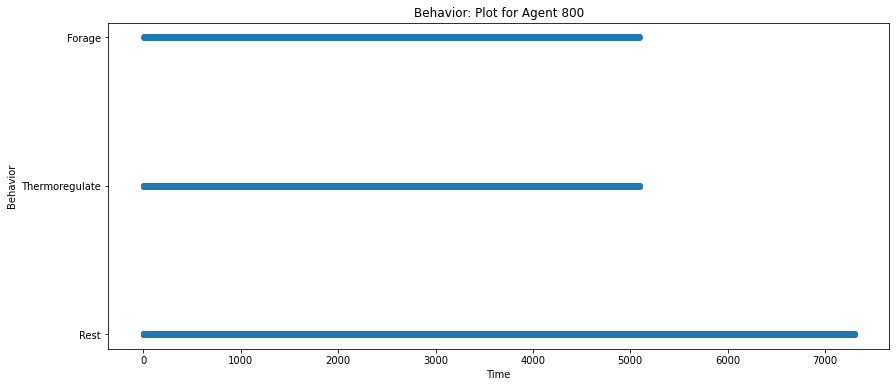

In [22]:
# Extract columns as Numpy arrays
single_snake = single_snake.dropna()
time = single_snake["Time_Step"]
values = single_snake["Behavior"]

# Plot using Matplotlib
plt.figure(figsize=(14, 6))
plt.scatter(time, values)
plt.xlabel("Time")
plt.ylabel("Behavior")
plt.title("Behavior: Plot for Agent 800")
plt.show()

In [26]:
df_pd = df.sort_values(by=["Agent_ID", "Time_Step"])

# Now you can proceed with the Pandas approach
import pandas as pd

# Shift the 'Behavior' column within each agent group to get the previous behavior
df_pd['previous_state'] = df_pd.groupby("Agent_ID")['Behavior'].shift(1)

# Filter out rows where the previous state is null (i.e., the first time step for each agent)
df_filtered = df_pd[df_pd['previous_state'].notnull()]

# Count transitions
transitions = df_filtered.groupby(["previous_state", "Behavior"]).size().reset_index(name="transition_count")

# Calculate total transitions from each previous state
total_transitions = transitions.groupby("previous_state")["transition_count"].sum().reset_index(name="total_transitions")

# Merge to get transition probabilities
transition_probabilities = transitions.merge(total_transitions, on="previous_state")
transition_probabilities["transition_probability"] = (
    transition_probabilities["transition_count"] / transition_probabilities["total_transitions"]
)

print(transition_probabilities)

   previous_state        Behavior  transition_count  total_transitions  \
0          Forage          Forage            157415             288198   
1          Forage            Rest             81691             288198   
2          Forage  Thermoregulate             49092             288198   
3            Rest          Forage             81947             725238   
4            Rest            Rest            520597             725238   
5            Rest  Thermoregulate            122694             725238   
6  Thermoregulate          Forage             48833             445764   
7  Thermoregulate            Rest            122943             445764   
8  Thermoregulate  Thermoregulate            273988             445764   

   transition_probability  
0                0.546204  
1                0.283454  
2                0.170341  
3                0.112993  
4                0.717829  
5                0.169178  
6                0.109549  
7                0.275803  
8      

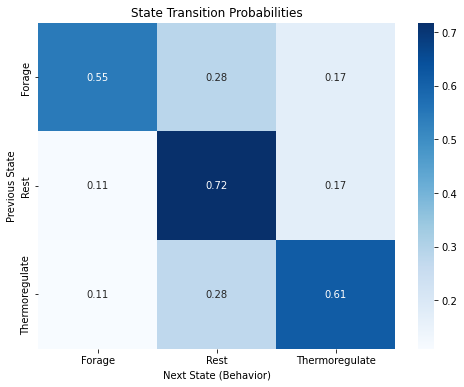

In [27]:
# This could be a good test
import seaborn as sns

heatmap_data = transition_probabilities.pivot(index="previous_state", columns="Behavior", values="transition_probability")

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title("State Transition Probabilities")
plt.xlabel("Next State (Behavior)")
plt.ylabel("Previous State")
plt.show()